In [2]:
import pandas as pd 
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the set after the cleaning process.
data = pd.read_csv('./csv_files/analysis_dataset2.csv.gz',
                   sep='\t',
                   compression='gzip',
                   dtype={'code': 'object'})
data.shape

(724450, 42)

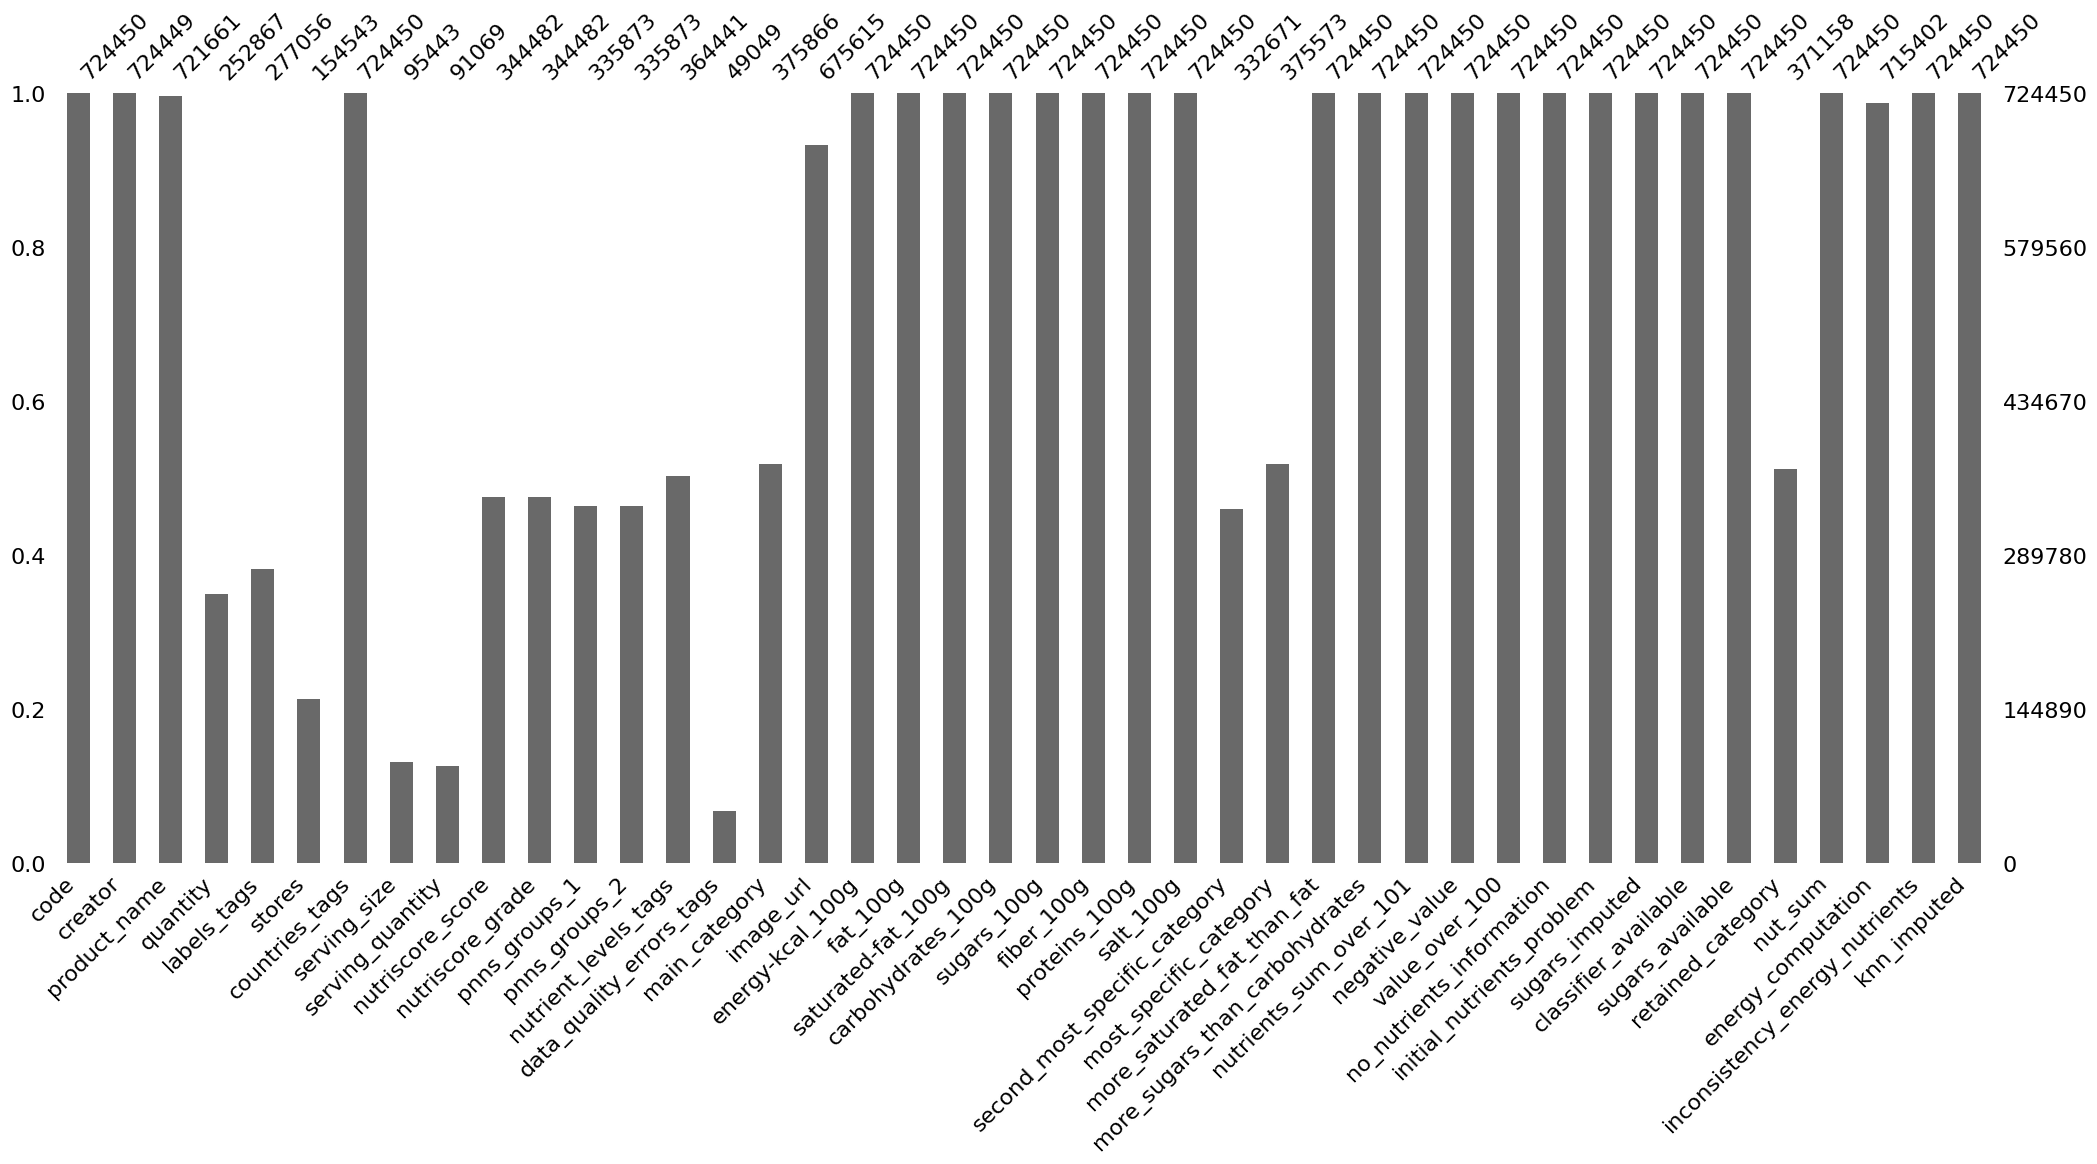

In [62]:
msno.bar(data)
plt.show()

**Table of contents**<a id='toc0_'></a>    
- 1. [Some stats](#toc1_)    
- 2. [ Univariate analysis](#toc2_)    
  - 2.1. [Nutrients](#toc2_1_)    
  - 2.2. [Energy](#toc2_2_)    
  - 2.3. [Nutriscore](#toc2_3_)    
  - 2.4. [Pnns groups 1](#toc2_4_)    
  - 2.5. [Pnns groups 2](#toc2_5_)    
  - 2.6. [Stores](#toc2_6_)    
  - 2.7. [Serving quantity](#toc2_7_)    
  - 2.8. [Serving size](#toc2_8_)    
  - 2.9. [Quantity](#toc2_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1.  [&#9650;](#toc0_) <a id='toc1_'></a>Some stats

We give percentages of :
- products with a specific category
- products with a pnns groups 1
- products corrected but which had an initial problems.
- the number of products which had some values imputed with the knn_imputer
- products with an inconsistency between energy and nutrients

In [122]:
# Percentage of products with a specific category
round(data.retained_category.notnull().mean()*100,
      2)

51.23

In [123]:
# Percentage of products with a pnns groups 1
round(data.pnns_groups_1.notnull().mean()*100,
      2)

46.36

In [121]:
#products corrected but which had an initial problems.

# Creating tags for nutrients problems.
sat_fat = 'more_saturated_fat_than_fat'
sug_carbo = 'more_sugars_than_carbohydrates'
nutsum_101 = 'nutrients_sum_over_101'
neg = 'negative_value'
over100 = 'value_over_100'
nutprob = 'initial_nutrients_problem' # At least one of the above problems.
no_nut ='no_nutrients_information'

pbs = [nutprob,
       sat_fat,
       sug_carbo,
       over100,
       neg,
       no_nut,
       nutsum_101]


print(f"                 pbs             number     pct")
print('-'*50)
for pb in pbs:
       col = data.loc[:, pb]
       print(f"{pb:>30} {col.sum():>8}{(col.mean()*100).round(3):>8}")

                 pbs             number     pct
--------------------------------------------------
     initial_nutrients_problem     3745   0.517
   more_saturated_fat_than_fat      278   0.038
more_sugars_than_carbohydrates      794    0.11
                value_over_100       68   0.009
                negative_value        5   0.001
      no_nutrients_information        0     0.0
        nutrients_sum_over_101     2674   0.369


In [124]:
# number of products which had some values 
# imputed with the knn_imputer.
data.knn_imputed.sum()

18313

# 2.  [&#9650;](#toc0_) <a id='toc2_'></a> Univariate analysis


## 2.1.  [&#9650;](#toc0_) <a id='toc2_1_'></a>Nutrients

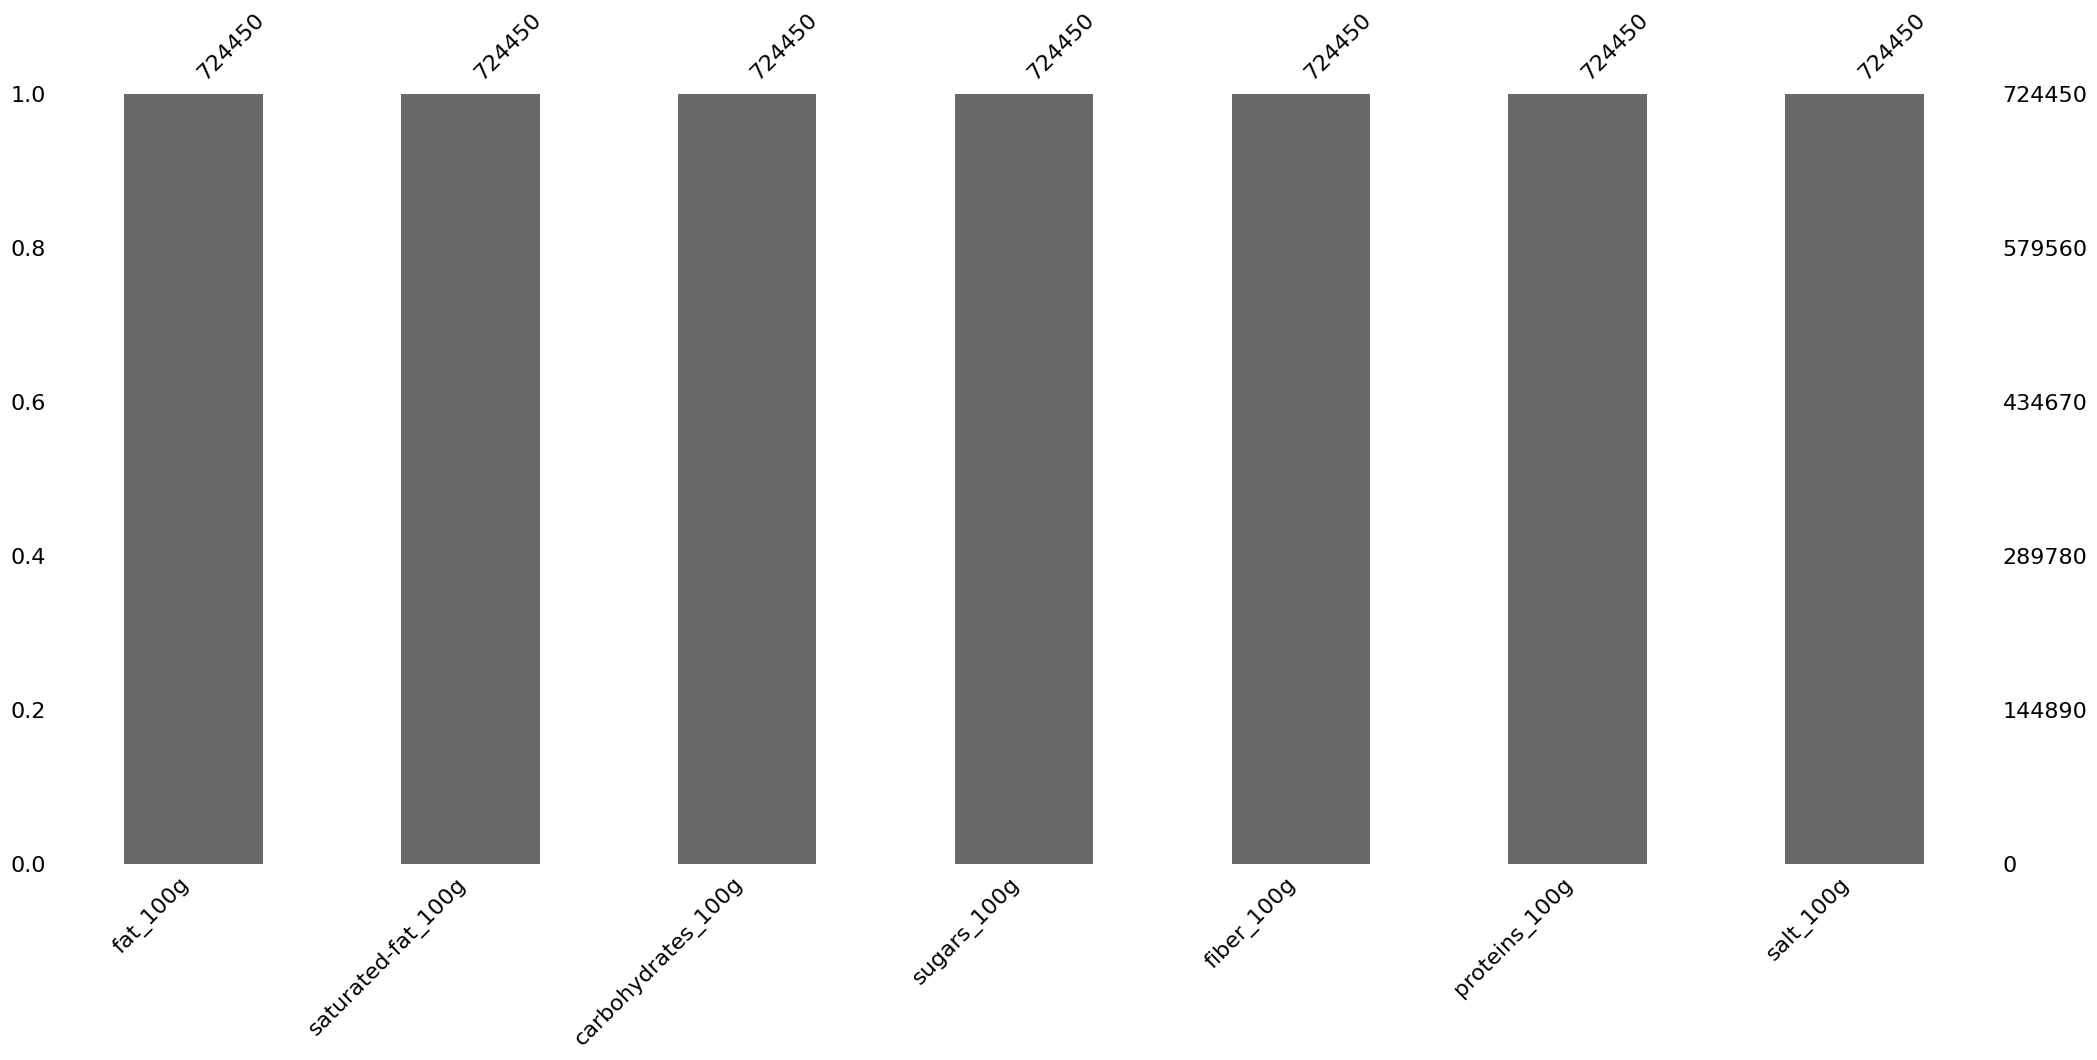

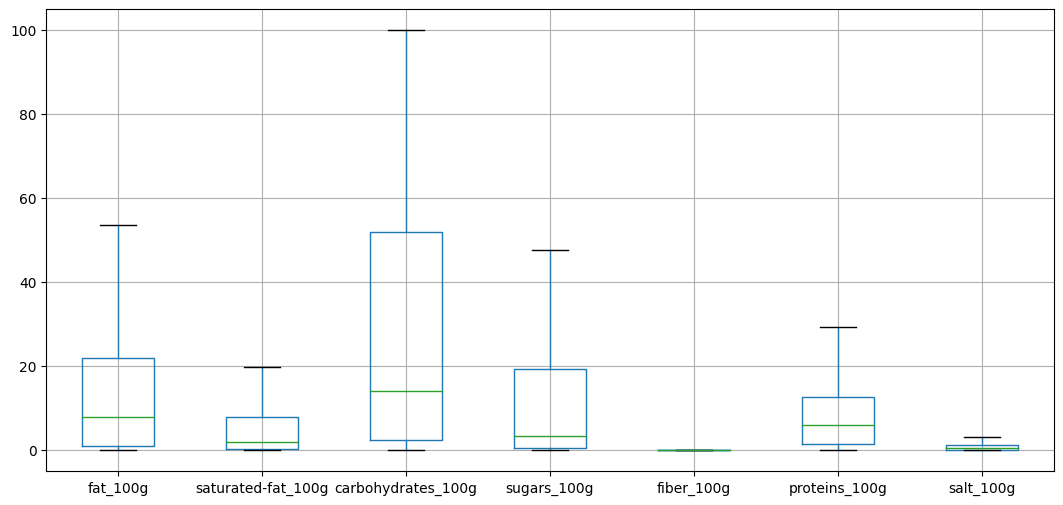

In [63]:
# Preparing the df
nutrients_f = ['fat_100g',
               'saturated-fat_100g',
               'carbohydrates_100g',
               'sugars_100g',
               'fiber_100g',
               'proteins_100g',
               'salt_100g']

num = data.loc[:, nutrients_f]
msno.bar(num)
plt.show()

num.boxplot(nutrients_f,
            figsize=(13,6),
            showfliers=False)
plt.show()

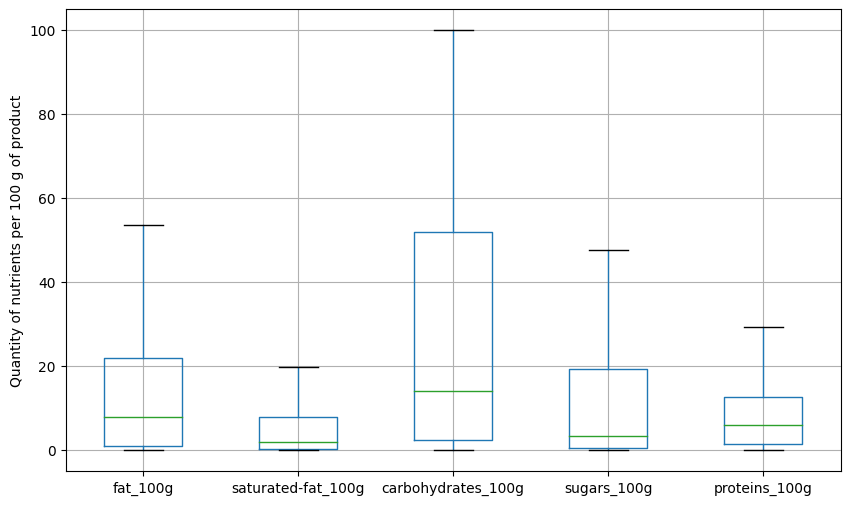

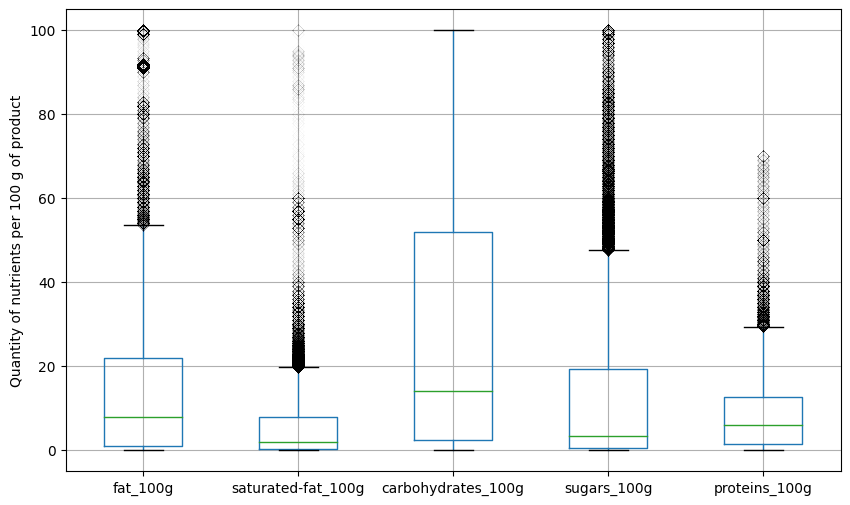

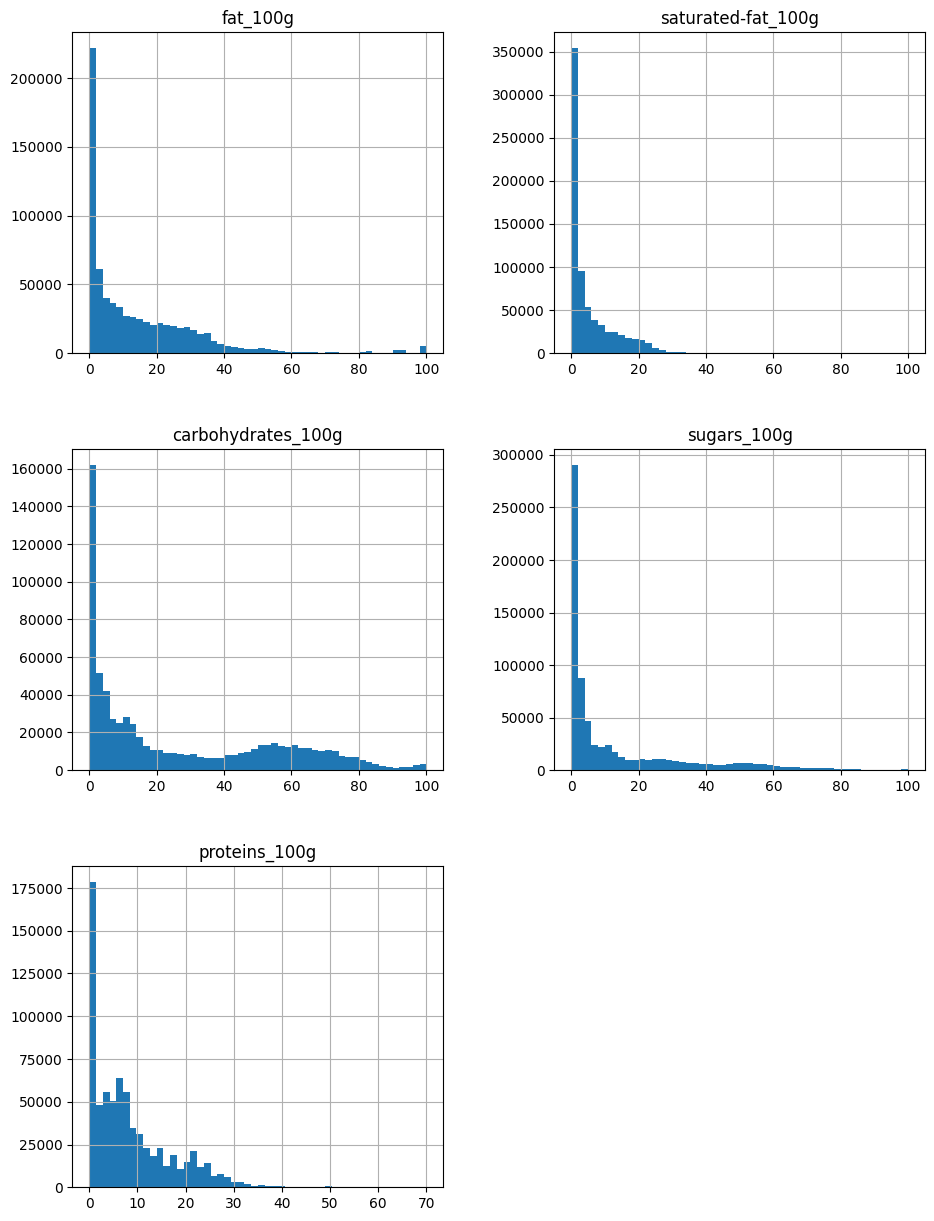

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g
count,724450.000000,724450.000000,724450.000000,724450.000000,724450.000000
mean,14.176815,5.411285,26.984903,13.613238,8.534729
std,17.451391,7.907632,27.628661,19.919349,8.750142
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.200000,2.500000,0.600000,1.400000
50%,8.000000,2.000000,14.000000,3.400000,6.100000
75%,22.000000,8.000000,52.000000,19.400000,12.600000
max,100.000000,100.000000,100.000000,100.000000,70.000000


In [64]:
# Sharing the y-axis is not optimal for visualization
# Separating in 2 nutrients groups. 
nut1 = ['fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'proteins_100g']

nut2 = ['fiber_100g',
        'salt_100g']

num.boxplot(nut1,
            figsize=(10,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.boxplot(nut1,
            figsize=(10,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'})
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.hist(nut1, figsize=(11,15),bins=50)
plt.show()

num[nut1].describe()

We observe that saturated fat and sugars are constrained by respectively fat and carbohydrates. 

They have similar shapes but are more squeezed to low values.

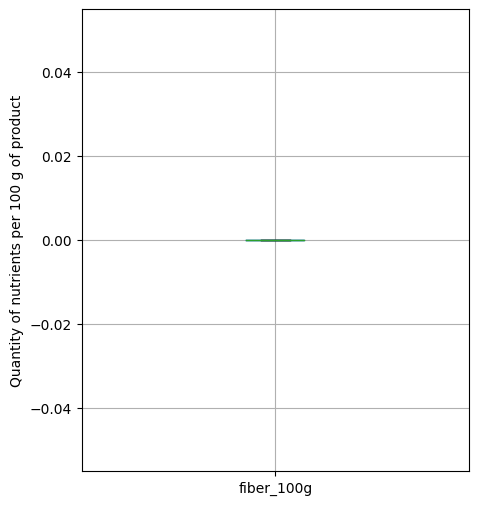

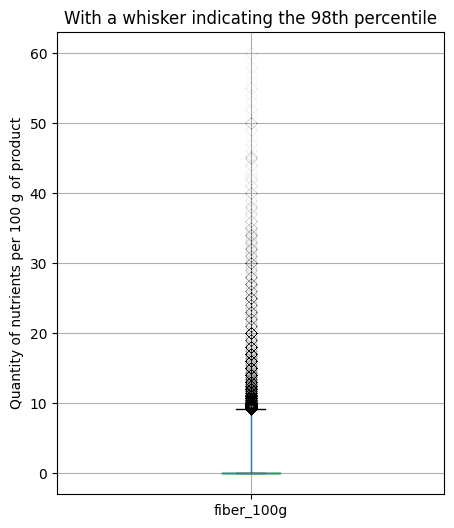

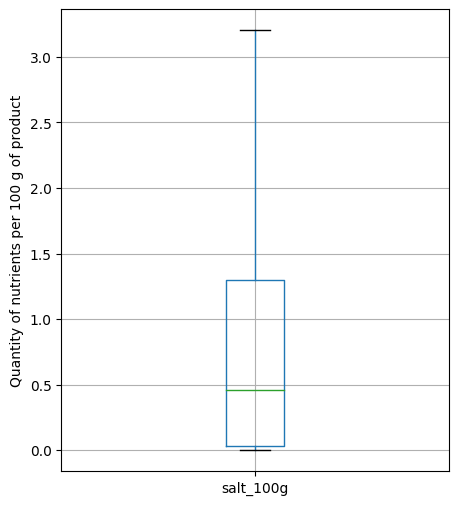

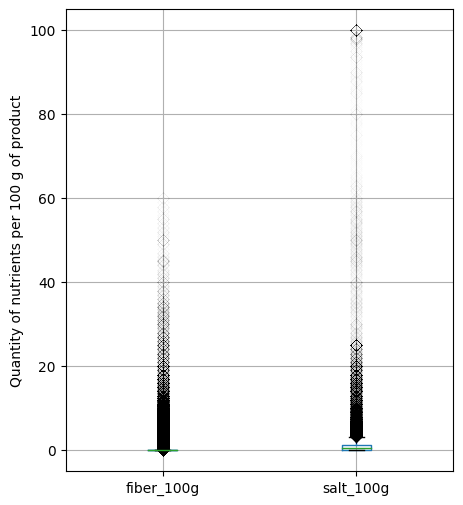

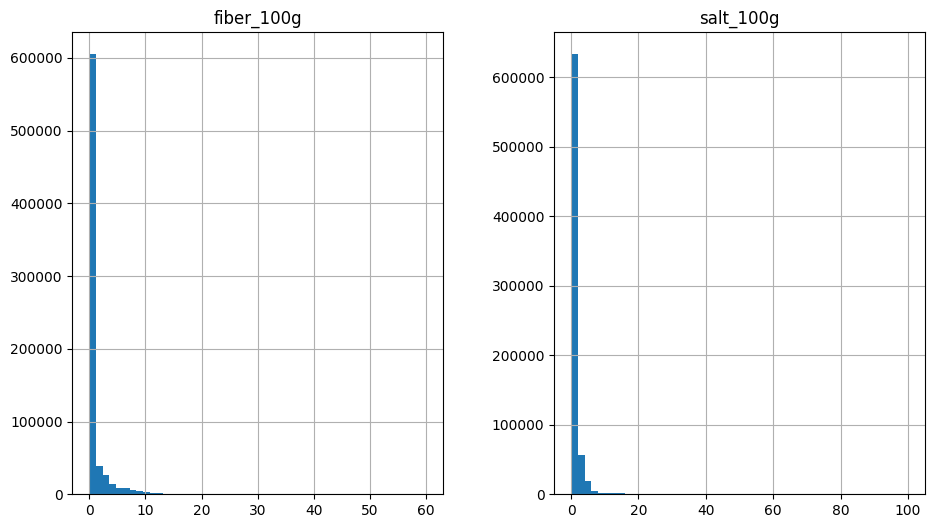

,fiber_100g,salt_100g
count,724450.000000,724450.000000
mean,0.866300,1.156065
std,2.905959,3.756265
min,0.000000,0.000000
25%,0.000000,0.030000
50%,0.000000,0.460000
75%,0.000000,1.300000
max,60.000000,100.000000


In [65]:
num.boxplot('fiber_100g',
            figsize=(5,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.boxplot('fiber_100g',
            figsize=(5,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'},
            whis=(0,98))
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.title('With a whisker indicating the 98th percentile')
plt.show()

num.boxplot('salt_100g',
            figsize=(5,6),
            showfliers=False)
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()


num.boxplot(nut2,
            figsize=(5,6),
            showfliers=True,
            flierprops={'marker': 'D',
                        'alpha': 0.005,
                        'color': 'blue'})
plt.ylabel('Quantity of nutrients per 100 g of product')
plt.show()

num.hist(nut2, figsize=(11,6),bins=50)
plt.show()

num[nut2].describe()

Globally we can order nutrients as such :

It is easier to find a plethora of products with a high rate of :
1. carbohydrates/sugars
2. fat/saturated-fat
3. proteins
4. salt
5. fiber

However, this has to be tempered by the fact we did a large imputation of fiber to 0. Then fiber may not be the last in reality.


## 2.2.  [&#9650;](#toc0_) <a id='toc2_2_'></a>Energy

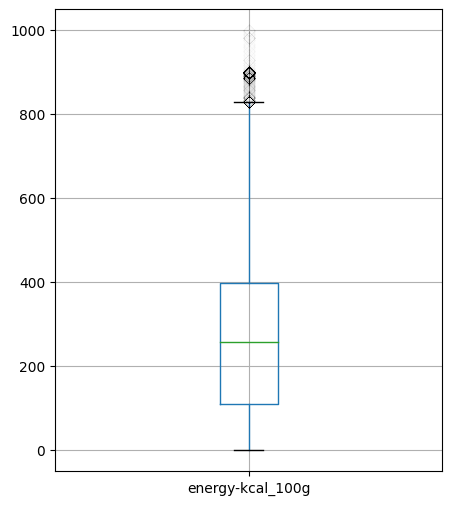

count    724450.000000
mean        270.301310
std         187.354209
min           0.000000
25%         110.000000
50%         257.000000
75%         397.000000
max         999.000000
Name: energy-kcal_100g, dtype: float64

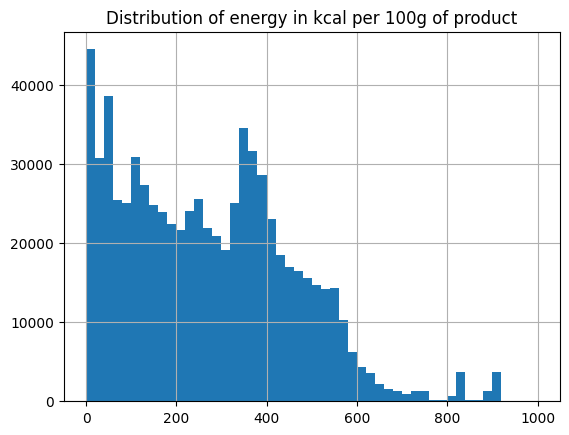

In [66]:
data.boxplot('energy-kcal_100g',
             figsize=(5,6),
             showfliers=True,
             flierprops={'marker': 'D',
                         'alpha': 0.005,
                         'color': 'blue'})
plt.show()

display(data['energy-kcal_100g'].describe())

data['energy-kcal_100g'].hist(bins=50)
plt.title('Distribution of energy in kcal per 100g of product')
plt.show()


In [67]:
high_energy = data.loc[data['energy-kcal_100g'] > 800,
                       ['pnns_groups_2', 'retained_category']]

high_energy.shape

(9777, 2)

In [68]:
display(high_energy.pnns_groups_2.value_counts().head(15))
display(high_energy.retained_category.value_counts().head(30))

fats                        6444
cereals                      280
dressings and sauces          44
salty and fatty products      14
processed meat                13
meat                          12
biscuits and cakes             9
nuts                           8
sweets                         7
cheese                         6
fruits                         5
pizza pies and quiches         4
bread                          4
one-dish meals                 4
dried fruits                   3
Name: pnns_groups_2, dtype: int64

huiles d'olive vierges extra     2434
huiles d'olive                    483
matières grasses                  480
huiles de coco                    375
huiles de tournesol               292
huiles de colza                   235
huiles de noix                    205
huiles de sésame                  153
huiles                            148
en:huile d’olive vierge extra     126
huiles de noisette                102
olio extra vergine di oliva        95
mélanges d'huiles                  89
huiles de pépins de raisins        72
huiles vierges de coco             71
extra-virgin olive oils            69
graisse de canard                  55
huiles de lin                      52
huiles de chanvre                  48
huile d'olive de nyons             44
huiles d'argan                     42
huiles d'arachide                  38
huiles de pépins de courge         37
huiles d'avocat                    36
en:extra-virgin-olive-oils         35
aceites de oliva virgen extra      32
ghees       

Oils are the most caloric products!

Some outliers can be found here, we shall investigate those high energy products which are in groups where fat is not the main nutrients (cereals, sweets, meat, fruits...) 

They probably are not in the right group, or there is a pb in nutrients/energy...

## 2.3.  [&#9650;](#toc0_) <a id='toc2_3_'></a>Nutriscore

In [69]:
print(data.nutriscore_score.notnull().mean().round(2))
print(data.nutriscore_score.notnull().sum())

0.48
344482


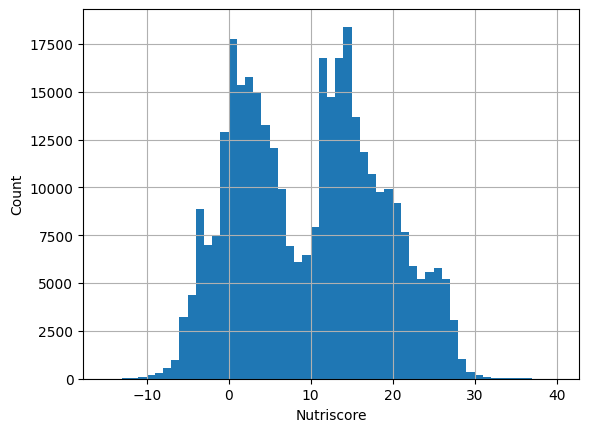

In [70]:
data.nutriscore_score.hist(bins=55)
plt.xlabel('Nutriscore')
plt.ylabel('Count')
plt.show()

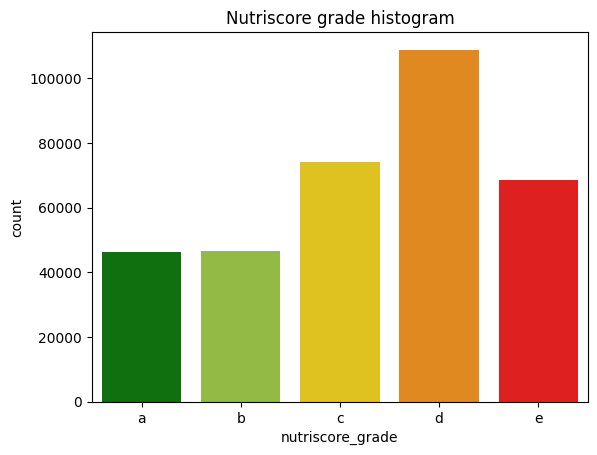

In [88]:
sns.countplot(x=data.nutriscore_grade,
              order=['a', 'b', 'c', 'd', 'e'],
              palette = ['green', 'yellowgreen', 'gold', 'darkorange', 'red'])
plt.title('Nutriscore grade histogram')
plt.show()

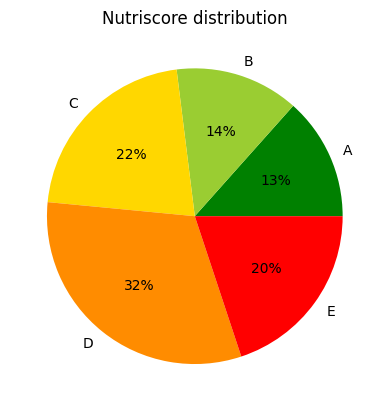

In [84]:
#define data
a = data.nutriscore_grade.value_counts()
a.sort_index(inplace=True)
values = a.values
labels = ['A', 'B', 'C', 'D', 'E']
#define Seaborn color palette to use
colors = ['green', 'yellowgreen', 'gold', 'darkorange', 'red']

#create pie chart
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Nutriscore distribution')
plt.show()

## 2.4.  [&#9650;](#toc0_) <a id='toc2_4_'></a>Pnns groups 1

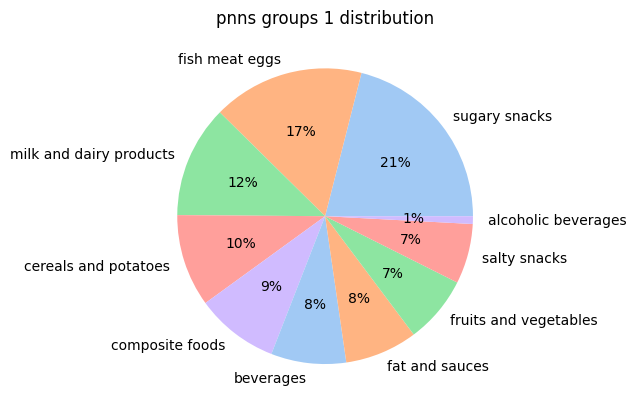

In [72]:
a = data.pnns_groups_1.value_counts()
values = a.values
labels = a.index
colors = sns.color_palette('pastel')[0:5]t
plt.pie(values, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('pnns groups 1 distribution')
plt.show()

## 2.5.  [&#9650;](#toc0_) <a id='toc2_5_'></a>Pnns groups 2

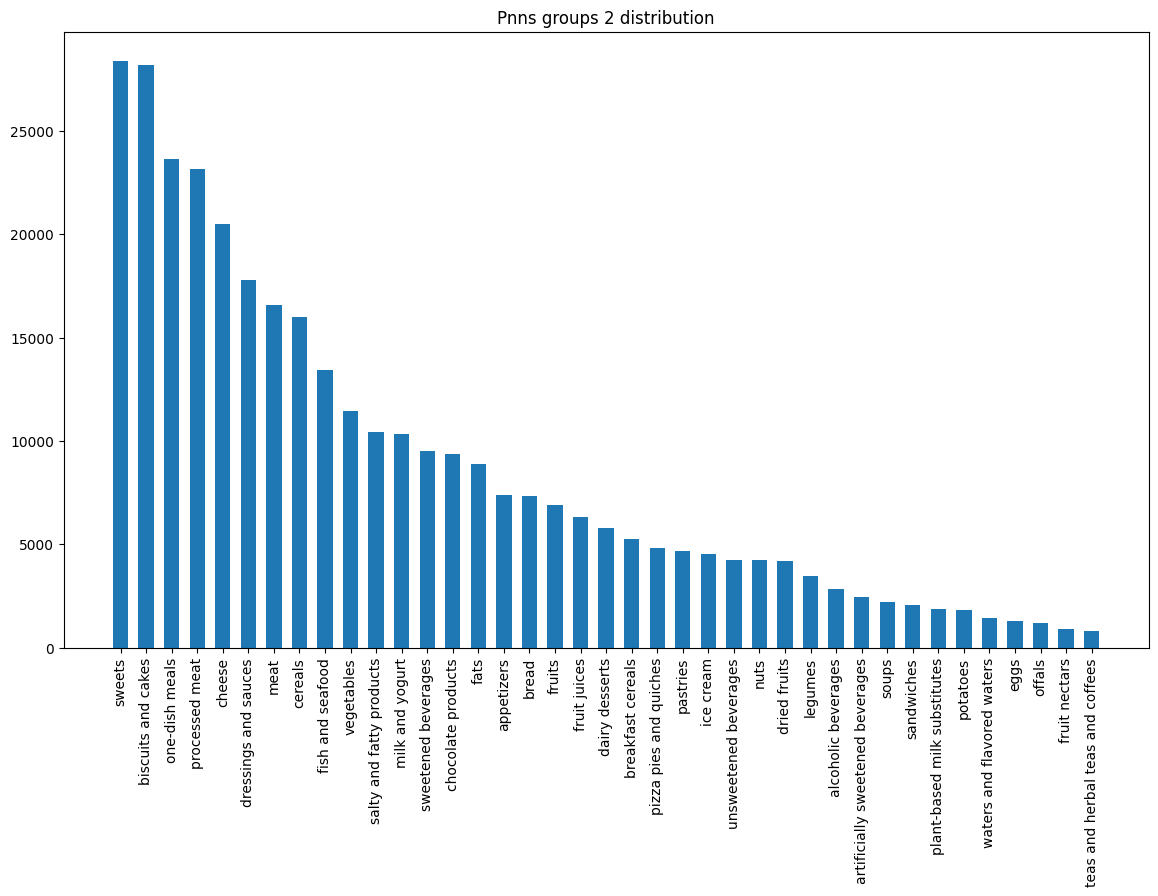

In [105]:
a = data.pnns_groups_2.value_counts()
vals = a.values
labels = a.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.6)
plt.xticks(rotation='vertical')
plt.title('Pnns groups 2 distribution')
plt.show()

## 2.6.  [&#9650;](#toc0_) <a id='toc2_6_'></a>Stores

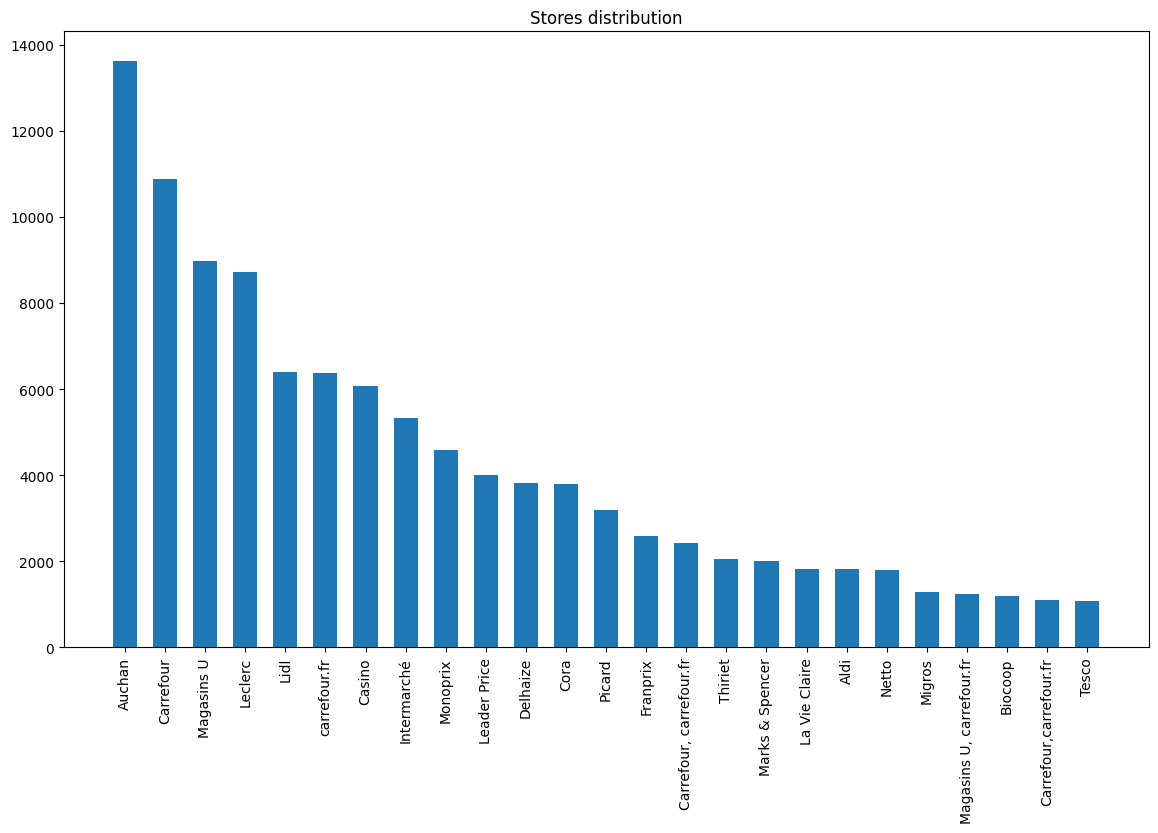

In [112]:
stores = data.stores.value_counts().head(25)
vals = stores.values
labels = stores.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.6)
plt.xticks(rotation='vertical')
plt.title('Stores distribution')
plt.show()

I will need to write functions in order to join products sold, for example, in 'magasins U' and 'Super U'. Or careffour, with carrefour.fr

Managing string formatting somehow.

## 2.7.  [&#9650;](#toc0_) <a id='toc2_7_'></a>Serving quantity

In [114]:
serving_q = data.serving_quantity.value_counts().head(20)
serving_q

100.0    15840
30.0      6059
0.0       5265
200.0     4296
250.0     3480
25.0      3312
125.0     3164
50.0      2238
40.0      2190
20.0      2131
150.0     2084
300.0     1926
15.0      1666
10.0      1594
60.0      1305
45.0      1156
80.0      1118
90.0      1088
35.0       889
120.0      846
Name: serving_quantity, dtype: int64

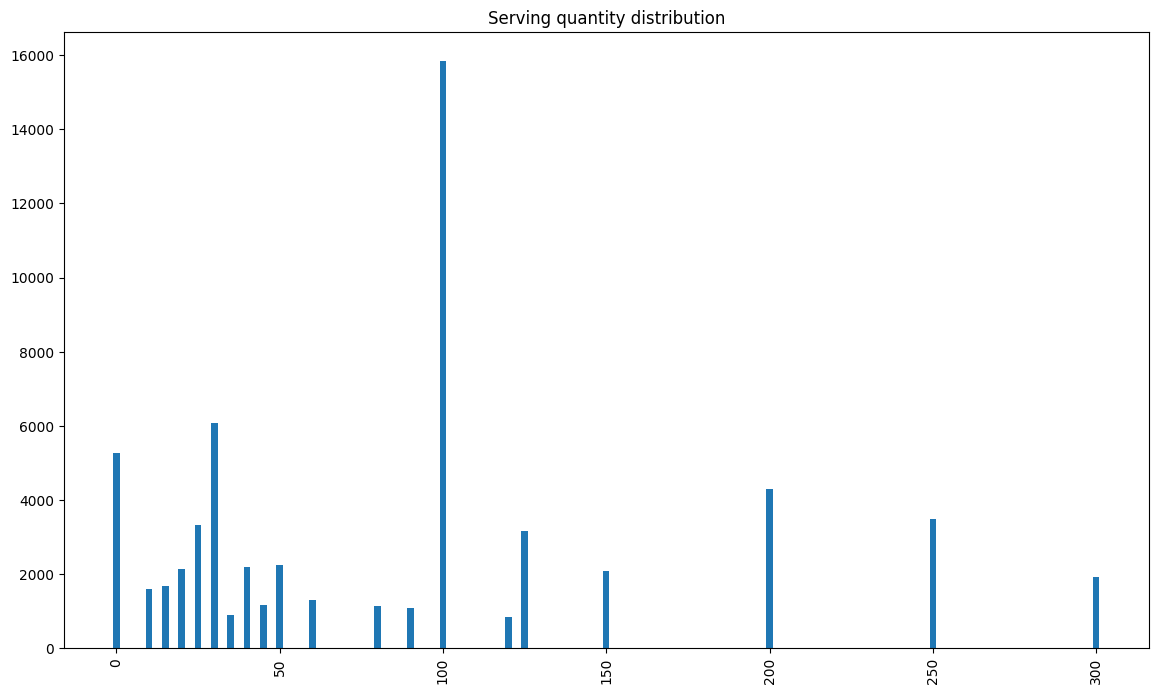

In [116]:
vals = serving_q.values
labels = serving_q.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=2)
plt.xticks(rotation='vertical')
plt.title('Serving quantity distribution')
plt.show()

## 2.8.  [&#9650;](#toc0_) <a id='toc2_8_'></a>Serving size

serving    9276
100g       7931
100 g      4072
30 g       3341
100.0g     1768
25 g       1741
30g        1655
125 g      1484
250 ml     1172
200 g      1129
50 g       1072
40 g       1049
200 ml     1028
300 g      1022
20 g       1021
125g        981
25g         968
150 g       788
100ml       743
10 g        710
Name: serving_size, dtype: int64

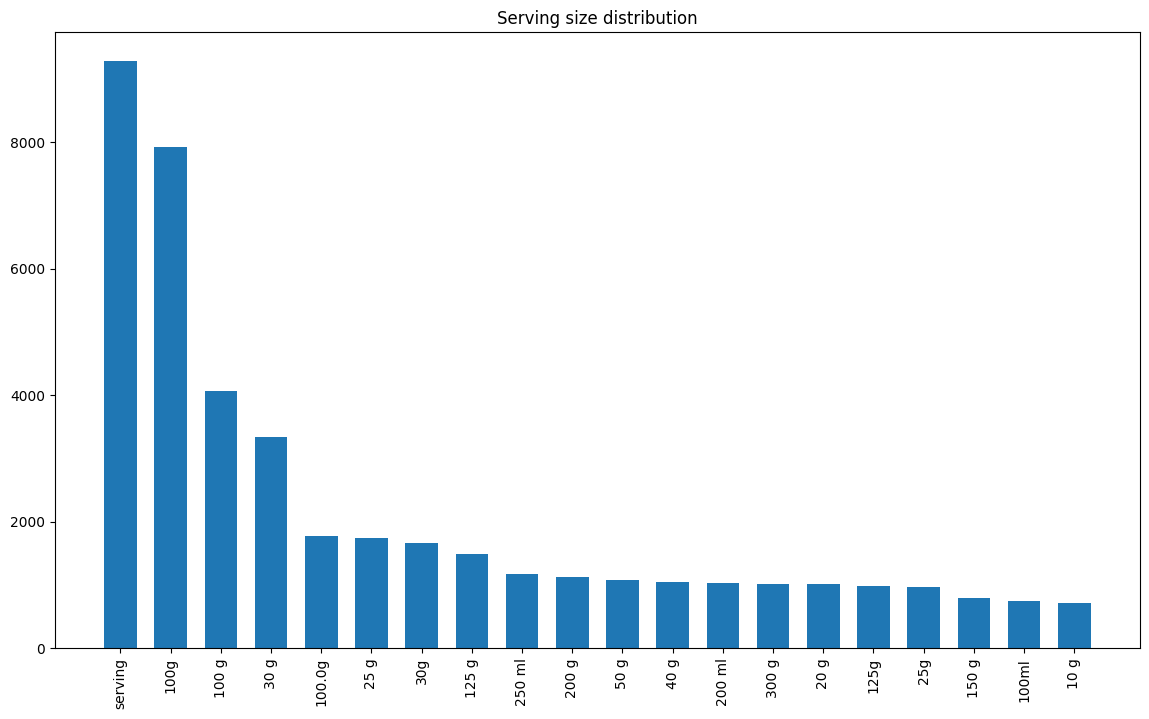

In [118]:
serving_s = data.serving_size.value_counts().head(20)
display(serving_s)
vals = serving_s.values
labels = serving_s.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.65)
plt.xticks(rotation='vertical')
plt.title('Serving size distribution')
plt.show()

Serving quantity seems better to process the quantity of sugars in one element of the products.

I would use that to assess the % of the maximum daily intake in sugars advise bu the ANSES.

## 2.9.  [&#9650;](#toc0_) <a id='toc2_9_'></a>Quantity

500 g    11752
250 g    10749
200 g    10738
100 g     8022
300 g     7681
400 g     7478
150 g     6174
1 kg      5374
180 g     4012
125 g     3483
350 g     3473
1 l       2910
120 g     2686
1 L       2323
500g      2144
90 g      2063
450 g     2036
600 g     1954
80 g      1951
200g      1838
Name: quantity, dtype: int64

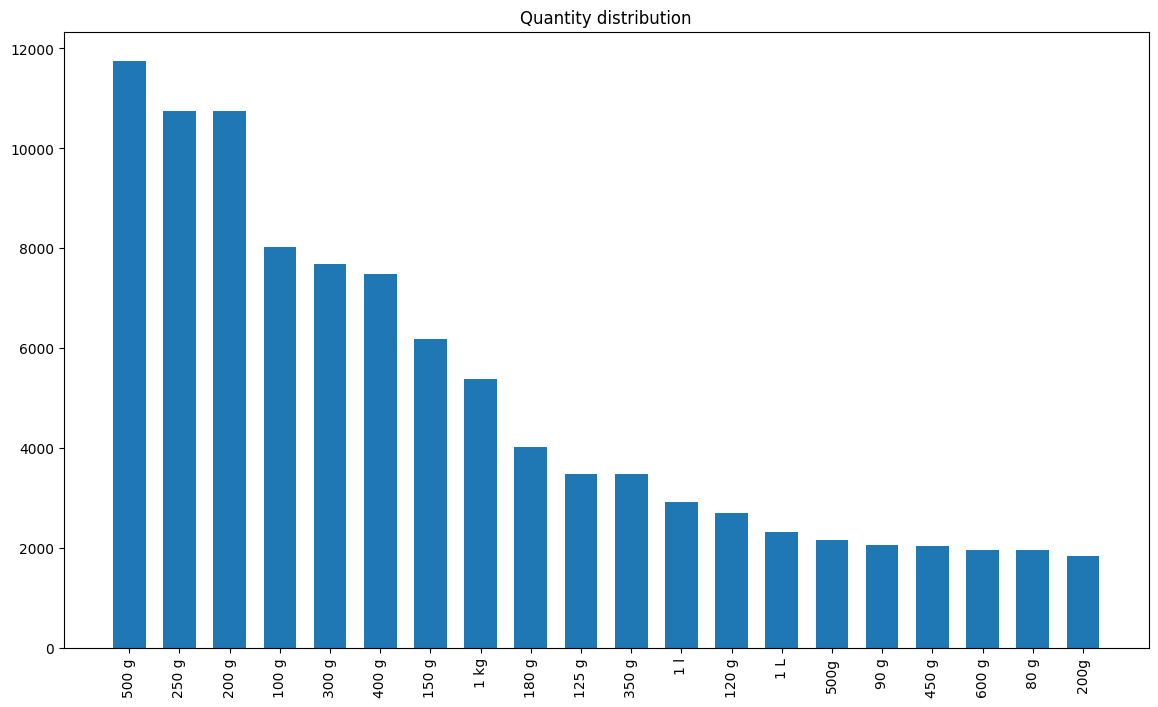

In [119]:
quantity = data.quantity.value_counts().head(20)
display(quantity)
vals = quantity.values
labels = quantity.index
plt.figure(figsize=(14,8))
plt.bar(labels, vals, label=labels, width=0.65)
plt.xticks(rotation='vertical')
plt.title('Quantity distribution')
plt.show()

Not very useful compared to serving quantity regarding the app features. 

# Bi-variate analysis

## Linear correlations

In [21]:
num_var = data.select_dtypes(include=['float64', 'int64']).columns
print(num_var)
num_var = num_var[:-2]
print(num_var)

Index(['serving_quantity', 'nutriscore_score', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'nut_sum', 'energy_computation'],
      dtype='object')
Index(['serving_quantity', 'nutriscore_score', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g'],
      dtype='object')


In [22]:
num_data = data.loc[:, num_var]
num_data.corr()

,serving_quantity,nutriscore_score,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g
serving_quantity,1.000000,0.002735,-0.001206,0.000382,-0.000292,-0.002865,-0.002289,-0.001810,0.001574,0.001306
nutriscore_score,0.002735,1.000000,0.554590,0.472164,0.572895,0.215942,0.391925,-0.185432,0.065127,0.182346
energy-kcal_100g,-0.001206,0.554590,1.000000,0.772491,0.581265,0.432856,0.303904,0.109035,0.189687,-0.038535
fat_100g,0.000382,0.472164,0.772491,1.000000,0.711019,-0.122947,-0.061962,0.011061,0.168400,0.002739
saturated-fat_100g,-0.000292,0.572895,0.581265,0.711019,1.000000,-0.055792,0.038240,-0.029011,0.172419,-0.003190
carbohydrates_100g,-0.002865,0.215942,0.432856,-0.122947,-0.055792,1.000000,0.705045,0.123887,-0.219268,-0.099417
sugars_100g,-0.002289,0.391925,0.303904,-0.061962,0.038240,0.705045,1.000000,0.003276,-0.290057,-0.110828
fiber_100g,-0.001810,-0.185432,0.109035,0.011061,-0.029011,0.123887,0.003276,1.000000,0.077372,-0.015645
proteins_100g,0.001574,0.065127,0.189687,0.168400,0.172419,-0.219268,-0.290057,0.077372,1.000000,0.098655
salt_100g,0.001306,0.182346,-0.038535,0.002739,-0.003190,-0.099417,-0.110828,-0.015645,0.098655,1.000000


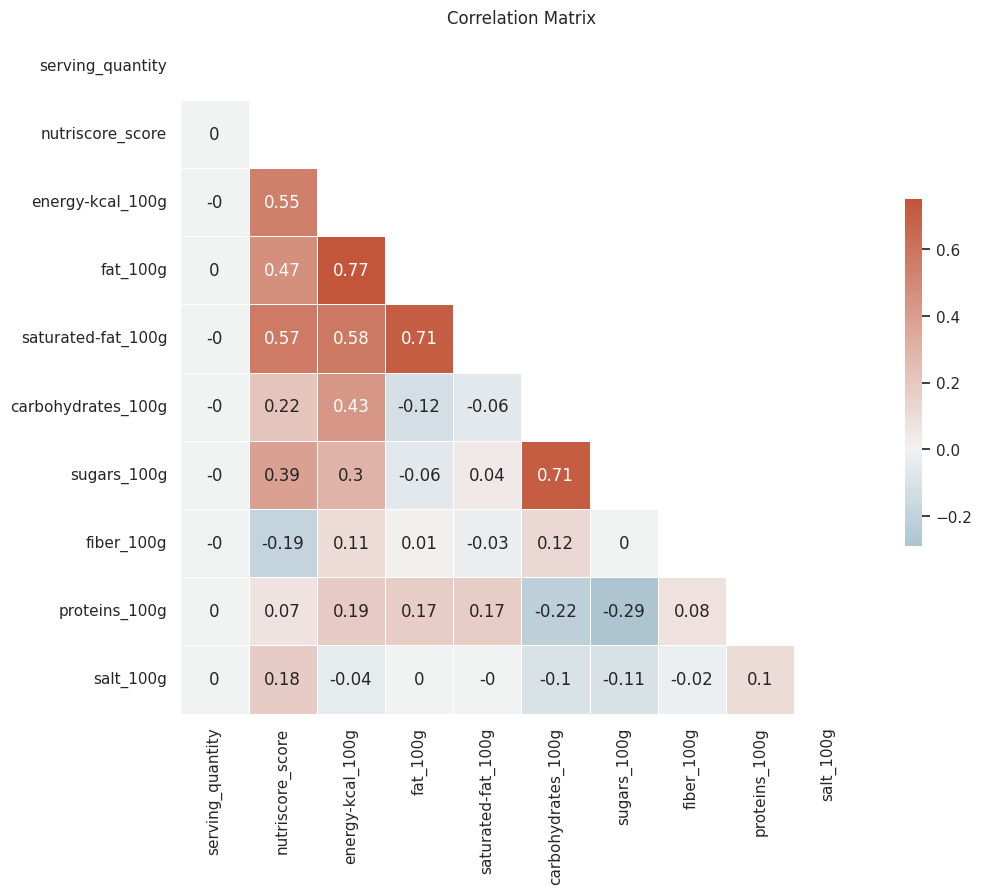

In [25]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = num_data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.round(2), mask=mask, annot=True,
            cmap=cmap, vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

This is a first way to summarize the nutriscore.

Let's remind that the nutriscore is close to -15 when perfect and close to 40 when very bad.

The nutriscore correlation column can be interpreted as such. 

Globally, in order of importance:
- the higher the saturated-fat (and fat), the worse the nutriscore. 
- the higher the sugars, the worse the nutriscore. 
- the higher carbohydrates, the worse the nutriscore (but it is less correlated and mainly due to the fact that high sugars forces high carbohydrates as a subclass).
- high salt means worse nutriscore.

On the contrary, high proteins and overall high fiber improve the nutriscore.

**This justifies the main idea of the application : to indicate people when sugars is too high, and pinpoint to better products of the same category**
***

We also see that :
- fat and saturated-fat are very correlated.
- carbohydrates and sugars are very correlated.
- serving size is not correlated with any feature (normal, because the other features are measures per 100g).
- energy is highly correlated with fat (underling factor 9) and less, but still, with carbohydrates, and then proteins (underlying factor 4).



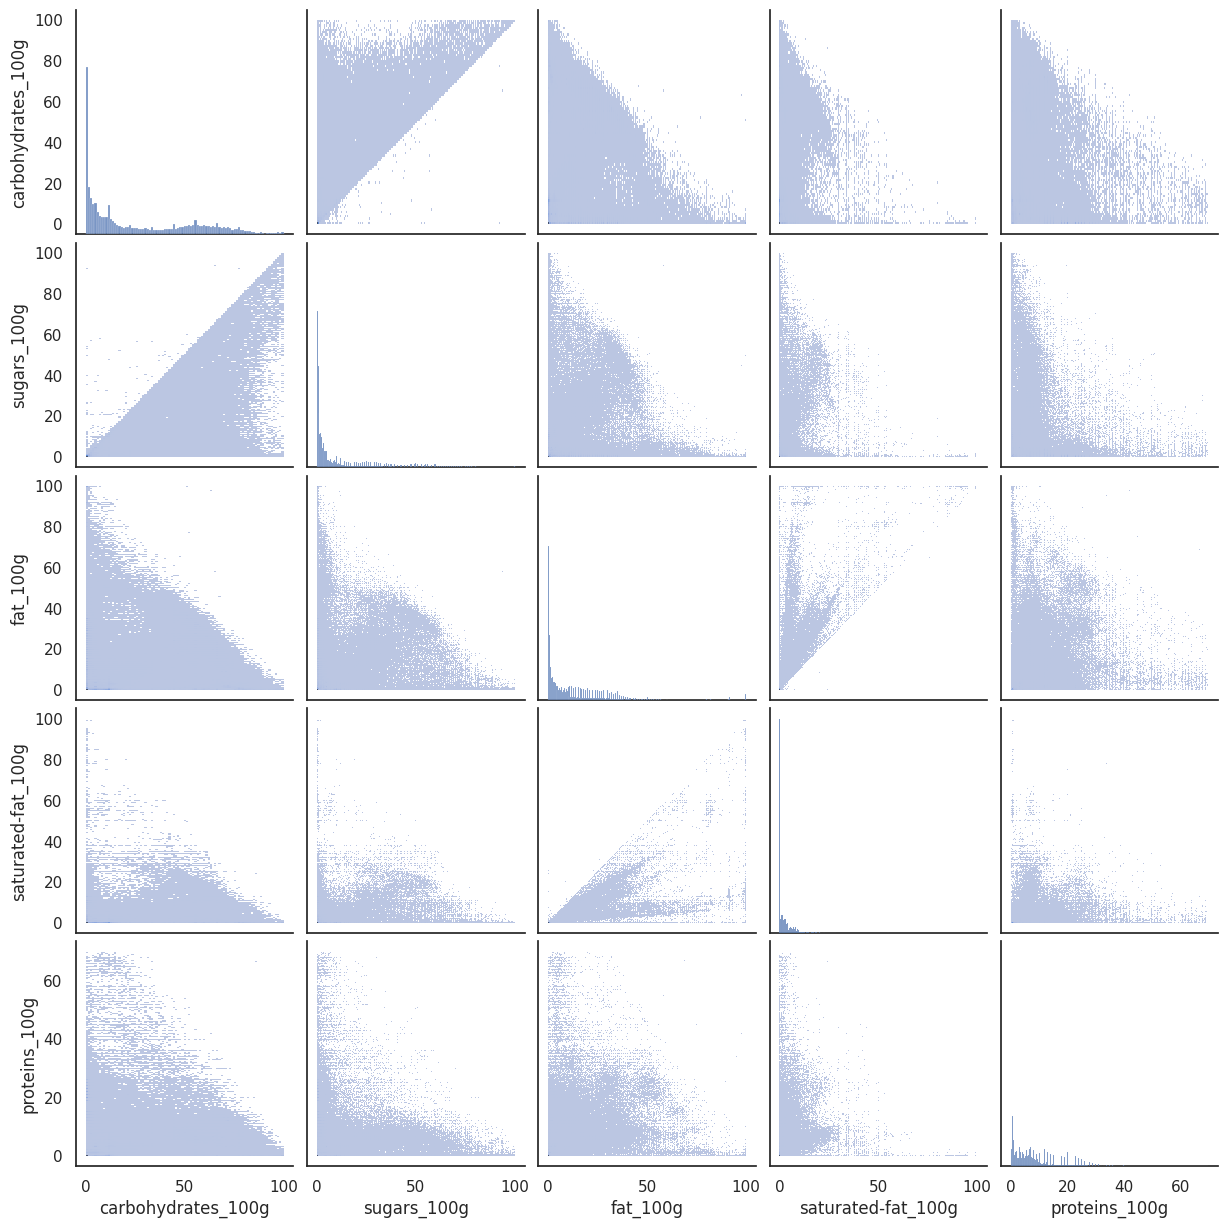

In [167]:
from itertools import combinations sns.pairplot(data=data[['pnns_groups_1','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','proteins_100g']],
             kind='hist')

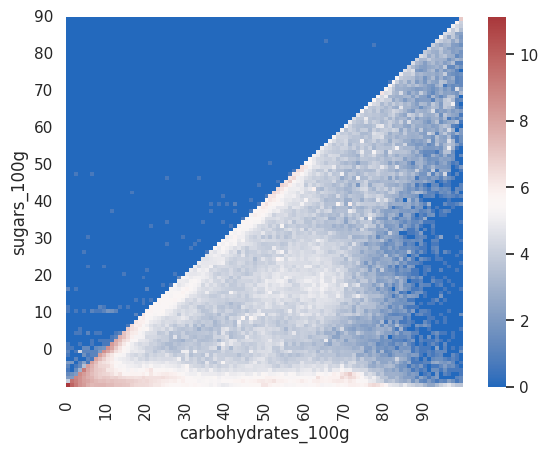

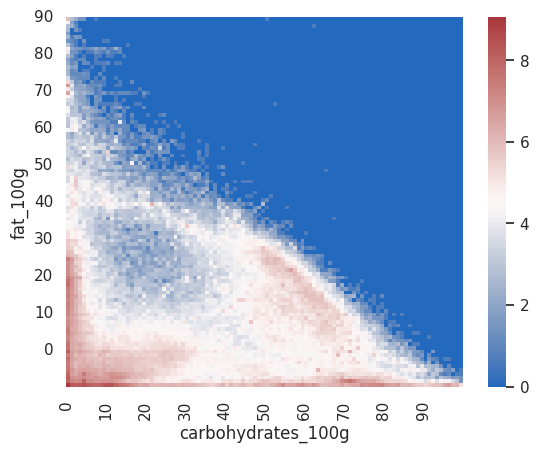

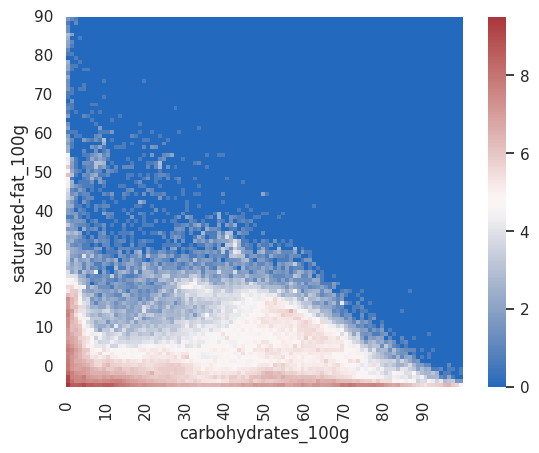

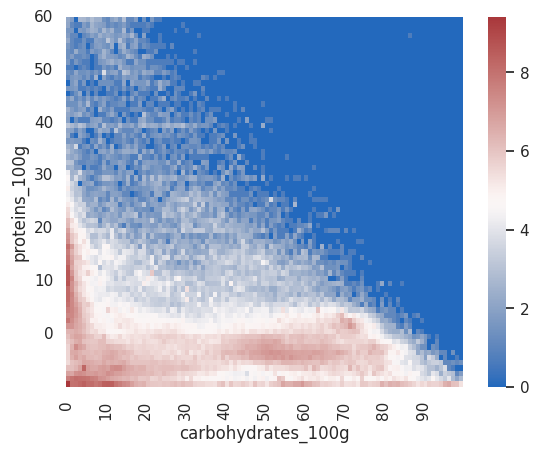

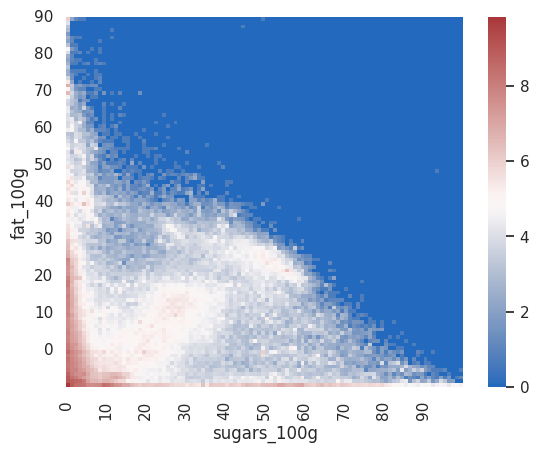

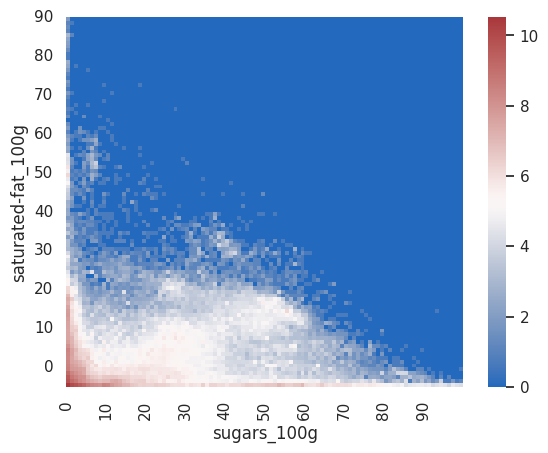

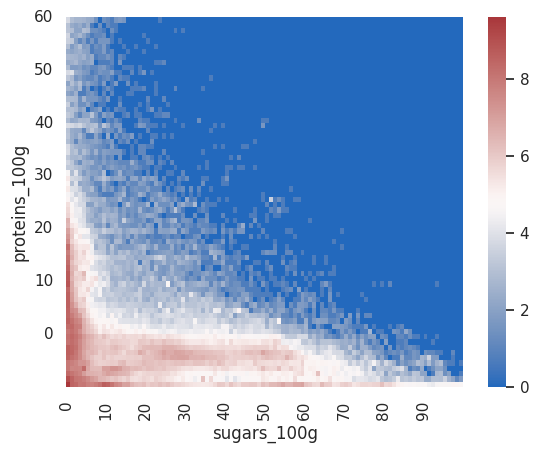

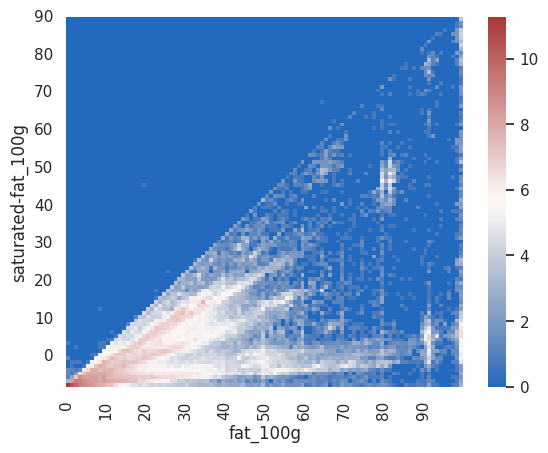

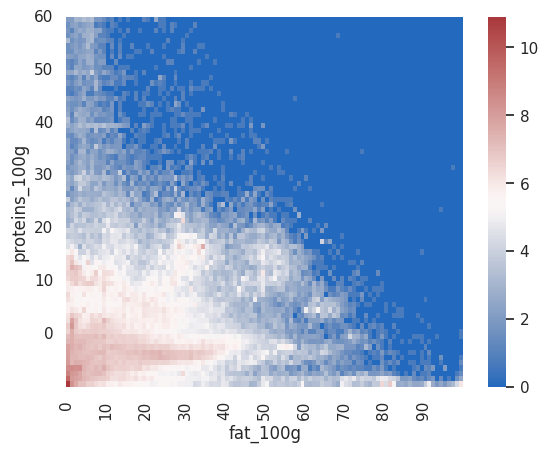

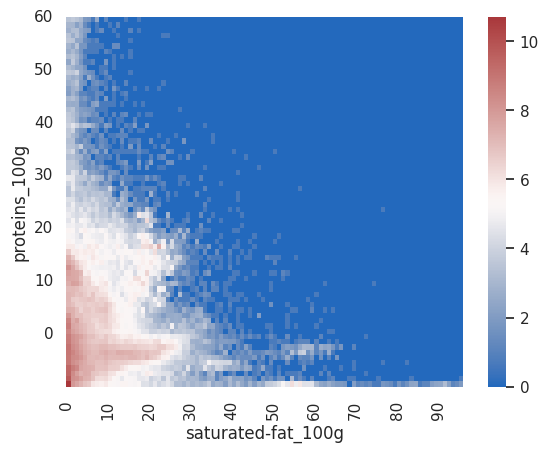

In [67]:
from itertools import combinations 

principal_nutrients = ['carbohydrates_100g',
                       'sugars_100g',
                       'fat_100g',
                       'saturated-fat_100g',
                       'proteins_100g']

nut_extrema = {'fat_100g': (0, 100),
               'saturated-fat_100g': (0, 100),
               'carbohydrates_100g': (0, 100),
               'sugars_100g': (0, 100),
               'fiber_100g': (0, 60),
               'proteins_100g': (0, 70),
               'salt_100g': (0, 100)}


cmap = sns.color_palette("vlag", as_cmap=True)
combs = combinations(principal_nutrients, 2)
for comb in combs:
    x, y = comb
    xmin, xmax = nut_extrema[x]
    ymin, ymax = nut_extrema[y]
    bins = pd.interval_range(start=0, end=100)
    X = pd.cut(data[x],bins=bins)
    Y = pd.cut(data[y],bins=bins)
    mat = pd.crosstab(Y, X)
    mat = mat + 1
    log_mat = np.log(mat)
    log_mat_rev = log_mat.iloc[::-1]
    sns.heatmap(log_mat_rev, cmap=cmap)
    plt.xticks(np.arange(xmin,xmax+1,10), labels=np.arange(xmin,xmax+1,10))
    plt.yticks(np.arange(ymin,ymax+1,10), labels=np.arange(ymin,ymax+1,10)[::-1])
    plt.ylabel(f"{y}")
    plt.xlabel(f"{x}")
    plt.show()

In [66]:
x

'saturated-fat_100g'

In [65]:
log_mat_rev

saturated-fat_100g,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]",...,"(88, 89]","(89, 90]","(90, 91]","(91, 92]","(92, 93]","(93, 94]","(94, 95]","(95, 96]","(98, 99]","(99, 100]"
proteins_100g,,,,,,,,,,,,,,,,,,,,,
"(69, 70]",3.433987,3.637586,3.465736,3.135494,1.945910,1.791759,0.693147,2.484907,0.000000,1.098612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(68, 69]",2.995732,2.944439,2.197225,2.772589,1.386294,0.693147,0.000000,0.693147,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(67, 68]",2.772589,3.258097,3.332205,2.484907,2.079442,1.945910,0.000000,0.693147,1.386294,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(66, 67]",3.401197,2.708050,3.367296,2.564949,1.791759,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(65, 66]",3.583519,3.496508,2.397895,2.397895,1.386294,1.098612,0.693147,1.098612,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4, 5]",8.942984,8.292799,8.050703,7.701200,7.475906,7.188413,7.145196,6.933423,6.917706,7.087574,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(3, 4]",9.366746,8.756997,8.438799,7.617268,7.448334,7.398174,7.278629,6.873164,6.879356,6.934397,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(2, 3]",9.431562,8.366835,7.783641,7.301148,7.468513,7.377134,6.854355,6.726233,6.489205,6.548219,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [16]:
# Generate intervals for binning
bins = pd.interval_range(start=0, end=100)

test1 = data.loc[:1000, 'fat_100g']
test2 = data.loc[:1000, 'sugars_100g']
test3 = pd.cut(test1, bins=bins)
test4 = pd.cut(test2, bins=bins)
df = pd.concat([test1, test3, test2, test4], axis=1)
display(df)
pd.crosstab(test3, test4)

,fat_100g,fat_100g,sugars_100g,sugars_100g
0,0.2,"(0.0, 1.0]",3.9,"(3.0, 4.0]"
1,7.0,"(6.0, 7.0]",15.0,"(14.0, 15.0]"
2,8.2,"(8.0, 9.0]",22.0,"(21.0, 22.0]"
3,0.0,NaN,0.4,"(0.0, 1.0]"
4,3.0,"(2.0, 3.0]",3.0,"(2.0, 3.0]"
...,...,...,...,...
996,0.5,"(0.0, 1.0]",7.1,"(7.0, 8.0]"
997,17.0,"(16.0, 17.0]",25.0,"(24.0, 25.0]"
998,12.3,"(12.0, 13.0]",3.2,"(3.0, 4.0]"
999,7.9,"(7.0, 8.0]",4.1,"(4.0, 5.0]"


sugars_100g,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]",...,"(65, 66]","(69, 70]","(70, 71]","(74, 75]","(81, 82]","(84, 85]","(85, 86]","(88, 89]","(91, 92]","(95, 96]"
fat_100g,,,,,,,,,,,,,,,,,,,,,
"(0, 1]",15,10,1,5,8,2,2,2,2,2,...,1,2,1,2,0,0,0,0,0,1
"(1, 2]",10,14,17,2,2,1,1,1,0,2,...,0,0,0,0,0,0,0,1,0,0
"(2, 3]",12,21,5,10,1,0,0,2,1,2,...,0,0,0,0,0,0,0,0,0,0
"(3, 4]",7,5,4,8,12,2,3,1,2,2,...,0,0,0,0,0,0,0,0,0,0
"(4, 5]",5,8,9,5,9,0,1,0,1,0,...,0,0,0,0,0,6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(62, 63]",1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(64, 65]",2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"(65, 66]",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
np.arange(0,100,5)[::-1]


array([95, 90, 85, 80, 75, 70, 65, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15,
       10,  5,  0])

In [55]:
mat

fat_100g,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]",...,"(90, 91]","(91, 92]","(92, 93]","(93, 94]","(94, 95]","(95, 96]","(96, 97]","(97, 98]","(98, 99]","(99, 100]"
carbohydrates_100g,,,,,,,,,,,,,,,,,,,,,
"(0, 1]",8589,2807,3552,2813,2031,1869,1839,2366,1538,3292,...,49,122,18,4,12,6,14,16,70,394
"(1, 2]",3704,1422,1051,771,919,659,597,702,716,770,...,4,8,4,3,2,1,1,10,7,15
"(2, 3]",3555,1222,871,599,549,412,387,572,374,575,...,4,5,2,2,5,1,4,3,2,9
"(3, 4]",3703,1238,942,919,667,554,449,444,521,725,...,2,5,1,1,4,1,2,1,1,4
"(4, 5]",4638,3021,1122,1757,760,542,577,473,405,510,...,1,3,2,4,1,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(95, 96]",645,67,11,2,4,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
"(96, 97]",791,70,9,3,3,3,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
"(97, 98]",427,36,5,1,6,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [56]:
mat.iloc[::-1]

fat_100g,"(0, 1]","(1, 2]","(2, 3]","(3, 4]","(4, 5]","(5, 6]","(6, 7]","(7, 8]","(8, 9]","(9, 10]",...,"(90, 91]","(91, 92]","(92, 93]","(93, 94]","(94, 95]","(95, 96]","(96, 97]","(97, 98]","(98, 99]","(99, 100]"
carbohydrates_100g,,,,,,,,,,,,,,,,,,,,,
"(99, 100]",178,4,4,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(98, 99]",458,19,6,2,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(97, 98]",427,36,5,1,6,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"(96, 97]",791,70,9,3,3,3,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
"(95, 96]",645,67,11,2,4,1,1,2,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(4, 5]",4638,3021,1122,1757,760,542,577,473,405,510,...,1,3,2,4,1,1,1,1,1,4
"(3, 4]",3703,1238,942,919,667,554,449,444,521,725,...,2,5,1,1,4,1,2,1,1,4
"(2, 3]",3555,1222,871,599,549,412,387,572,374,575,...,4,5,2,2,5,1,4,3,2,9
